September 6, 2020
1. app data need to be divided into major sectors
    This is because after reading literature, you find different sectors follow different patterns and no previous paper write
    an entire paper on all-encompassing internet economy.

You could consider bringing in other data.

In [1]:
# import packages and define path
from pathlib import Path
import pickle
%matplotlib inline
import numpy as np
from google_play_scraper import app
from tqdm import tqdm
input_path = Path("/home/naixin/Insync/naixin88@sina.cn/OneDrive/_____GWU_ECON_PHD_____/___Dissertation___/____WEB_SCRAPER____")
output_path = Path("/home/naixin/Insync/naixin88@sina.cn/OneDrive/_____GWU_ECON_PHD_____/___Dissertation___/____WEB_SCRAPER____/___cleaned_datasets___")
# open an old dataset for tracking
q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / "202009" / "TRACKING_202002.pickle"
with open(q, 'rb') as filename:
    C = pickle.load(filename)
# run python scripts containing all the functions
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'

In [4]:
# get the unique id list from the old data
id_list = get_id_from_data_beofre_202009(C)
print(id_list)

TypeError: string indices must be integers

In [17]:
# scraping app details according to id
app_details = scraping_apps_according_to_id(id_list)
q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / "202009" / "TRACKING_202002.pickle"
pickle.dump(app_details, open(q,'wb'))

scraping...: 100%|██████████| 6860/6860 [3:05:01<00:00,  1.62s/it]      


In [2]:
# load a dataset for transforming/analysis
q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / "202009" / "TRACKING_202002.pickle"
with open(q, 'rb') as filename:
    C = pickle.load(filename)
# get a glimpse of the scraped raw data
get_a_glimpse(C)

the dataset contains 6860 unique apps.
com.google.toontastic
title  :  Toontastic 3D
description  :  3… 2… 1… ACTION! With Toontastic 3D you can draw, animate, and narrate your own cartoons. It’s as easy as play. Just move your characters around onscreen, tell your story, and Toontastic records your voice and animations and stores it on your device as a 3D video. Toontastic is a powerful and playful way to create interstellar adventures, breaking news reports, video game designs, family photo albums, or anything else you might imagine! 


What people are saying:
• Parents' Choice Gold Award: "Toontastic 3D is a wonderful creative outlet for all budding storytellers, young scientists, or those who increasingly blur the lines between the two - perhaps this is where the next documentary makers and Pixar artists will get their start."
• Five star rating from Common Sense Media - "Kids are in the director's seat and have free rein to let their creative side shine with this flexible and easy

In [3]:
# transform the dataset to categorical level
D = transform_raw_to_category_data(C)

[('MEDICAL', 347), ('GAME_PUZZLE', 337), ('GAME_ACTION', 305), ('EDUCATION', 297), ('GAME_CASUAL', 278), ('GAME_EDUCATIONAL', 267), ('GAME_ARCADE', 264), ('GAME_SIMULATION', 260), ('GAME_ROLE_PLAYING', 252), ('TOOLS', 220), ('ENTERTAINMENT', 211), ('PHOTOGRAPHY', 186), ('GAME_STRATEGY', 181), ('PRODUCTIVITY', 181), ('DATING', 175), ('MUSIC_AND_AUDIO', 168), ('PERSONALIZATION', 167), ('GAME_ADVENTURE', 161), ('GAME_RACING', 159), ('HEALTH_AND_FITNESS', 159), ('FINANCE', 152), ('GAME_SPORTS', 149), ('LIFESTYLE', 143), ('GAME_WORD', 143), ('BUSINESS', 140), ('SHOPPING', 135), ('SPORTS', 132), ('GAME_CARD', 129), ('SOCIAL', 124), ('COMMUNICATION', 118), ('FOOD_AND_DRINK', 113), ('TRAVEL_AND_LOCAL', 111), ('GAME_BOARD', 103), ('NEWS_AND_MAGAZINES', 100), ('HOUSE_AND_HOME', 85), ('GAME_MUSIC', 68), ('VIDEO_PLAYERS', 68), ('GAME_CASINO', 63), ('GAME_TRIVIA', 42), ('MAPS_AND_NAVIGATION', 40), ('WEATHER', 20), ('BOOKS_AND_REFERENCE', 18), ('PARENTING', 15), ('ART_AND_DESIGN', 14), ('AUTO_AND_VE

minInstalls (array([  62,   20,  102,   80,  301,  223,  711,  451, 1727,  910, 1578,
        351,  309]), array([0.e+00, 5.e+02, 1.e+03, 5.e+03, 1.e+04, 5.e+04, 1.e+05, 5.e+05,
       1.e+06, 5.e+06, 1.e+07, 5.e+07, 1.e+08, 5.e+09]))
score (array([ 40,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         1,   0,   0,   0,   0,   0,   2,   2,   0,   1,   3,   1,   0,
         0,   2,   3,   3,   1,   2,   2,   4,   3,   6,   3,   9,   6,
         7,   5,   8,   8,   7,  17,  14,  16,  17,  17,  13,  17,  23,
        24,  23,  34,  30,  28,  39,  48,  50,  69,  72,  75,  91,  98,
       138, 130, 180, 201, 220, 263, 322, 339, 358, 397, 441, 384, 402,
       389, 371, 330, 289, 246, 181, 122,  86,  46,  14,   9,   7]), array([0.        , 0.04854369, 0.09708738, 0.14563107, 0.19417476,
       0.24271845, 0.29126214, 0.33980583, 0.38834951, 0.4368932 ,
       0.48543689, 0.53398058, 0.58252427, 0.631067

TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

<Figure size 432x288 with 0 Axes>

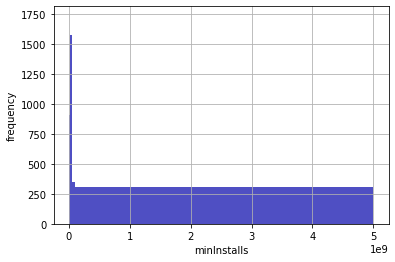

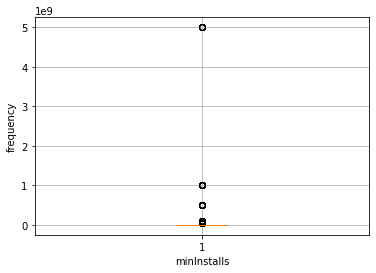

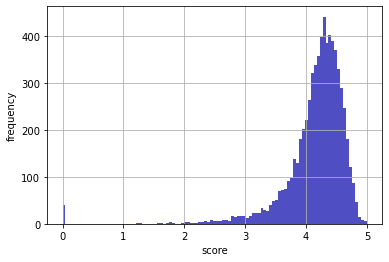

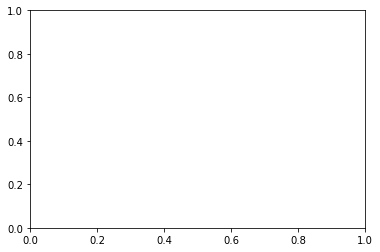

In [15]:
%run -i '2_functions_data_visualization.py'
# look at descriptive stats of apps in each category
histogram(C, "minInstalls")
boxplot(C, "minInstalls")

histogram(C, "score")
boxplot(C, "score")

In [8]:
for category in appdetails_categories.keys():
    content = []
    for appid, appdetails in C.items():
        if appdetails is not None:
            if appdetails['genreId'] == category:
                #print(appdetails['genreId'], category)
                content.append(appdetails)
    appdetails_categories[category] = content
for k, v in appdetails_categories.items():
    print(k, len(v))

print(appdetails_categories['EVENTS'][22])

MAPS_AND_NAVIGATION 40
GAME_CARD 129
GAME_STRATEGY 181
GAME_PUZZLE 337
EDUCATION 297
DATING 175
GAME_ACTION 305
GAME_SIMULATION 260
GAME_BOARD 103
SHOPPING 135
GAME_WORD 143
GAME_RACING 159
BEAUTY 6
GAME_CASUAL 278
GAME_ROLE_PLAYING 252
PRODUCTIVITY 181
GAME_CASINO 63
PHOTOGRAPHY 186
MUSIC_AND_AUDIO 168
GAME_EDUCATIONAL 267
GAME_SPORTS 149
VIDEO_PLAYERS 68
NEWS_AND_MAGAZINES 100
TRAVEL_AND_LOCAL 111
GAME_TRIVIA 42
BUSINESS 140
GAME_MUSIC 68
ENTERTAINMENT 211
HOUSE_AND_HOME 85
AUTO_AND_VEHICLES 9
SPORTS 132
LIFESTYLE 143
LIBRARIES_AND_DEMO 2
SOCIAL 124
FINANCE 152
EVENTS 5
COMICS 3
WEATHER 20
PARENTING 15
MEDICAL 347
COMMUNICATION 118
FOOD_AND_DRINK 113
BOOKS_AND_REFERENCE 18
HEALTH_AND_FITNESS 159
GAME_ARCADE 264
TOOLS 220
PERSONALIZATION 167
ART_AND_DESIGN 14
GAME_ADVENTURE 161


IndexError: list index out of range

In [ ]:
# now I think it could be better to transform the entire data to dataframe
import pandas
